# 📚 Amazon Bestselling Books: Exploratory Data Analysis

This notebook presents an exploratory data analysis (EDA) of Amazon’s top bestselling books dataset. The goal is to uncover key features and patterns that distinguish bestsellers from other books, using a combination of descriptive statistics, visualization, and simple statistical testing.

**Key steps and objectives in this analysis:**
- Load and clean the Amazon bestsellers dataset (including handling missing values and feature engineering).
- Explore the distribution of main variables such as ratings, price, and review counts.
- Compare characteristics between bestsellers and non-bestsellers, including statistical tests (e.g., t-tests).
- Visualize relationships between bestseller status and book features (e.g., genre, cover type, recency, rating).
- Examine interaction effects and year trends.
- Summarize insights that may help understand what drives a book to become a bestseller.

#### Data Source

This analysis uses data from the [**Amazon Top 50 Bestselling Books 2009–2019**](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019) dataset available on Kaggle.

- Each row represents a bestselling book for a given year between 2009 and 2019.
- Fields include: book name, author, user rating, number of reviews, price (USD), year, and genre (Fiction/Non Fiction).
- The dataset is suitable for analyzing book popularity, user preferences, pricing trends, and building predictive models (e.g., classification, regression).

> **Source:** [Kaggle - Amazon Top 50 Bestselling Books 2009-2019](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019)


## 📚 Data Description & Initial Processing

We analyze the [Amazon Top 50 Bestselling Books 2009–2019](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019) dataset, which includes information on top-selling books over a ten-year period.  
**Each row contains:**  
- **Name:** Book title  
- **Author:** Author of the book  
- **User Rating:** Average user rating (1–5 scale)  
- **Reviews:** Number of user reviews  
- **Price:** Price in USD  
- **Year:** Year the book was a bestseller  
- **Genre:** Fiction or Non Fiction  

---

## 🛠️ What Was Done

1. **Data Import & Inspection**  
   - Loaded the CSV data using pandas.
   - Displayed the first 10 rows to check basic structure and field meanings.

2. **Data Cleaning**  
   - Removed spaces from column names for easier referencing.
   - Dropped rows with missing values in `User Rating`, `Reviews`, or `Price`.
   - Filtered out books with non-positive prices to avoid errors.

3. **Feature Engineering**  
   - **Bestseller Label:** Created a binary variable `bestseller` (reviews > 20,000 as a threshold for bestseller status).  
   - **Popularity Score:** Defined a custom score as `User Rating × log(Reviews) ÷ Price` to quantify both quality and market popularity.  
     This metric combines user satisfaction, public attention, and affordability, offering a proxy for perceived value.  

4. **Descriptive Statistics**  
   - Summarized all major variables using `.describe()`:
     - Ratings range: **3.3–4.9**, mean ~4.6 (high overall quality)
     - Review count: from **37** up to **87,841**, large spread (median ~8,500)
     - Price: from **$1** up to **$105**, but most books are under $20
     - Bestseller ratio: ~19% of books in this set have >20,000 reviews
     - Popularity scores are also skewed, reflecting a handful of standout hits

---

## 📈 Key Takeaways

- **Dataset:** 538 books spanning 2009–2019, each with rich info on user feedback and pricing.
- **Most books are highly rated** (average rating 4.6), but reviews and prices vary widely.
- **About 1 in 5 books** in this sample are "bestsellers" by high-review count.
- **Feature engineering** enables later classification or ranking tasks, helping distinguish bestsellers from ordinary books.
- This step ensures a clean, ready-to-analyze dataset for deeper visualization and machine learning.

> Next steps could include data visualization, exploring trends over time, or building models to predict which books will become bestsellers.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load data about best seller books.
file_path = "/Users/quentingao/Library/CloudStorage/OneDrive-TulaneUniversity/R_or_Python/Python_jupyternotebook/Retail/Amazon_top100_bestselling_books_2009to2021.xlsx"

df = pd.read_excel(file_path)
df.head(10)




,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,0,12.49,1.0,The Lost Symbol,16118.0,4.4,Dan Brown,Hardcover,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392.0,4.7,William P. Young,Paperback,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036.0,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,1572.0,4.6,Sarah Palin,Hardcover,2009,Non Fiction
5,5,18.29,6.0,StrengthsFinder 2.0,7082.0,4.1,Gallup,Hardcover,2009,Non Fiction
6,6,12.66,7.0,The Help,18068.0,4.8,Kathryn Stockett,Hardcover,2009,Fiction
7,7,17.56,8.0,New Moon (The Twilight Saga),12329.0,4.7,Stephenie Meyer,Paperback,2009,Fiction
8,8,58.90,9.0,The Twilight Saga Collection,6100.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
9,9,16.04,10.0,Outliers: The Story of Success,22209.0,4.7,Malcolm Gladwell,Hardcover,2009,Non Fiction


In [41]:
# Clean data
# Drop NAs
df.columns = df.columns.str.strip()
df = df.dropna(subset=['ratings', 'no_of_reviews', 'price'])

# drop rows with price==0
df = df[df['price'] > 0].copy()

# Label as bestseller (assuming books with more than 20,000 reviews are considered bestsellers)
df['bestseller'] = (df['no_of_reviews'] > 20000).astype(int)

# Construct a popularity score: User Rating × log(Number of Reviews) / Price
df['popularity_score'] = df['ratings'] * np.log1p(df['no_of_reviews']) / df['price']

# Step 4: Descriptive statistic+visualization
print(df.describe())

        Unnamed: 0        price        ranks  no_of_reviews      ratings  \
count  1287.000000  1287.000000  1287.000000    1287.000000  1287.000000   
mean    644.674437    13.757117    50.246309   25827.712510     4.650894   
std     373.102457    10.046391    28.803308   32224.059482     0.197174   
min       0.000000     1.170000     1.000000      50.000000     3.400000   
25%     321.500000     8.550000    25.000000    6769.000000     4.600000   
50%     644.000000    12.100000    50.000000   16845.000000     4.700000   
75%     967.500000    16.290000    75.000000   32326.000000     4.800000   
max    1290.000000   144.000000   100.000000  344811.000000     4.900000   

              year   bestseller  popularity_score  
count  1287.000000  1287.000000       1287.000000  
mean   2015.024864     0.435897          4.376248  
std       3.737416     0.496067          2.825921  
min    2009.000000     0.000000          0.306877  
25%    2012.000000     0.000000          2.592679  
50%

In [33]:
df.sample(20)

,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,bestseller,popularity_score
702,702,7.63,11.0,A Man Called Ove: A Novel,56988.0,4.7,Fredrik Backman,Paperback,2016,Fiction,1,6.745463
872,872,12.11,81.0,The Trials of Apollo Book Two The Dark Prophec...,8856.0,4.8,Rick Riordan,Hardcover,2017,Fiction,0,3.602562
1066,1066,11.99,76.0,The Road Back to You: An Enneagram Journey to ...,10495.0,4.7,Ian Morgan Cron,Hardcover,2019,Non Fiction,0,3.629368
751,751,4.14,60.0,If Animals Kissed Good Night,69538.0,4.8,Ann Whitford Paul,Board book,2016,Fiction,1,12.927122
849,849,12.70,58.0,What to Expect When You're Expecting,29389.0,4.8,Heidi Murkoff,Paperback,2017,Non Fiction,1,3.888533
62,62,9.06,65.0,Culture of Corruption: Obama and His Team of T...,1094.0,4.6,Michelle Malkin,Hardcover,2009,Non Fiction,0,3.553327
694,694,4.78,3.0,First 100 Words: A Padded Board Book,35236.0,4.7,Roger Priddy,Board book,2016,Non Fiction,1,10.294624
1237,1237,24.00,47.0,Publication Manual (OFFICIAL) 7th Edition of t...,28579.0,4.8,American Psychological Association,Paperback,2021,Non Fiction,1,2.052092
64,64,16.97,67.0,"Diary of a Wimpy Kid, Book 1",16590.0,4.8,Jeff Kinney,Hardcover,2009,Fiction,0,2.748365
539,539,14.03,47.0,The Boys in the Boat: Nine Americans and Their...,31128.0,4.8,Daniel James Brown,Paperback,2014,Non Fiction,1,3.539579


## 📊 Exploratory Visualization of Amazon Bestsellers

In this step, I used seaborn and matplotlib to conduct an initial exploratory analysis of the Amazon bestsellers dataset, focusing on user ratings, review counts, and price-popularity relationships.

### 🛠️ What Was Done

1. **Distribution of User Ratings**
   - Plotted a histogram of `User Rating` to understand how ratings are distributed among bestselling books.

2. **Distribution of Number of Reviews**
   - Plotted a histogram of the number of `Reviews` (using 30 bins) to visualize the spread and skewness in review counts.

3. **Scatterplot: User Rating vs Reviews**
   - Created a scatterplot to check if there is a relationship between the average user rating and the number of reviews a book received.

4. **Scatterplot: Price vs Popularity Score**
   - Visualized how the calculated `popularity_score` changes with price, to explore if cheaper books tend to be more popular.

---

### 📈 Key Findings from the Plots

- **User Rating Distribution:**  
  Most bestselling books have high user ratings, with the distribution skewed toward the upper end (4.3–4.9). This suggests that customer satisfaction is generally high among bestsellers.

- **Number of Reviews Distribution:**  
  The distribution of review counts is highly skewed: while most books have fewer than 20,000 reviews, a few outliers have exceptionally high review numbers (up to 87,000+), indicating viral or evergreen titles.

- **User Rating vs Reviews:**  
  There is no clear linear relationship between rating and the number of reviews. Some books with very high ratings do not have many reviews, and vice versa—implying other factors (like marketing, time on market, genre) play a role in popularity.

- **Price vs Popularity Score:**  
  The scatterplot shows that **lower-priced books generally have higher popularity scores**, indicating that pricing strategy can strongly affect overall book success.

---

> These visualizations provide valuable insights for understanding what drives a book to become a bestseller on Amazon, and set the stage for further modeling or business analysis.


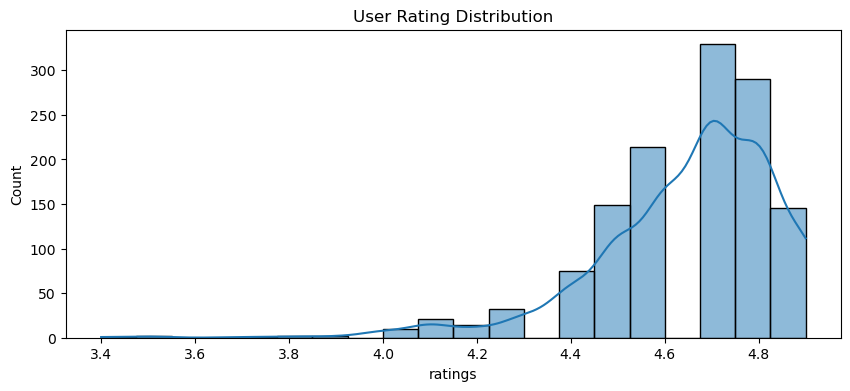

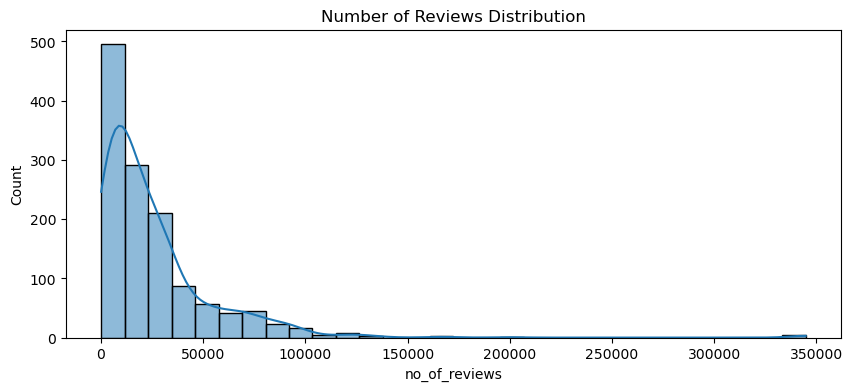

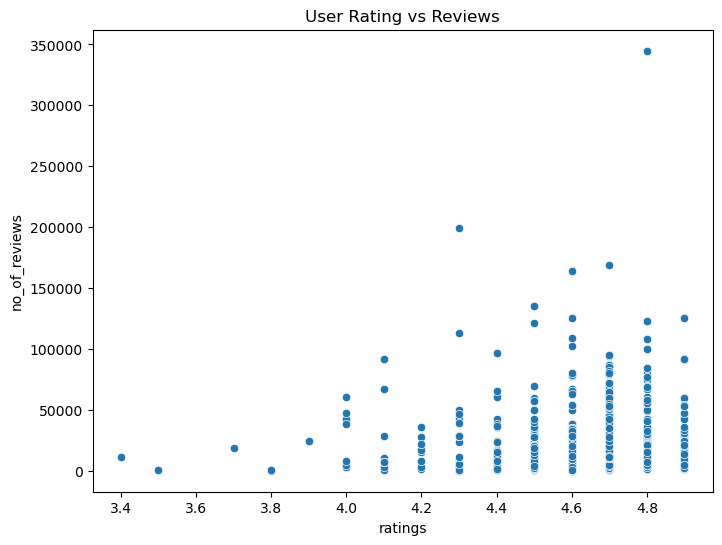

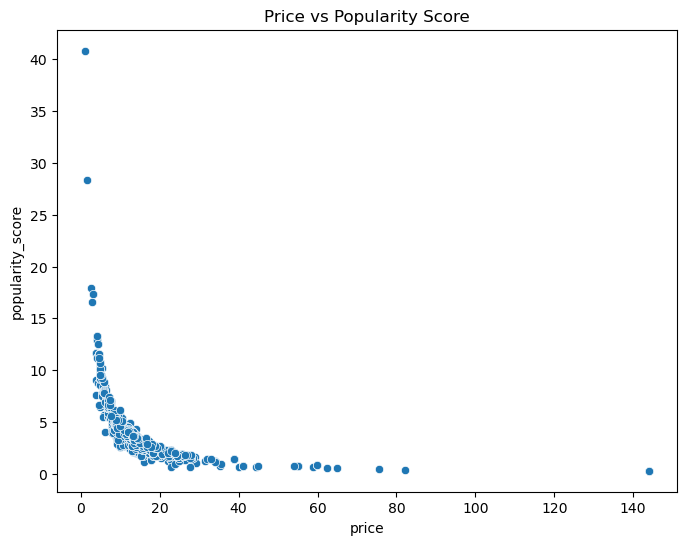

In [42]:
plt.figure(figsize=(10, 4))
sns.histplot(df['ratings'], bins=20, kde=True)
plt.title("User Rating Distribution")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['no_of_reviews'], bins=30, kde=True)
plt.title("Number of Reviews Distribution")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ratings', y='no_of_reviews', data=df)
plt.title("User Rating vs Reviews")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='popularity_score', data=df)
plt.title("Price vs Popularity Score")
plt.show()

## 🚀 Bestseller Classification Modeling

### 🛠️ What Was Done

- **Feature Selection:**  
  Selected key features for classification: `User Rating`, `Reviews`, `Price`, and `popularity_score`.

- **Model Building:**  
  - Split the data into training and test sets (70/30 split, random seed for reproducibility).
  - Trained a **Random Forest Classifier** to predict whether a book is a bestseller (`bestseller` label).
  - Evaluated the model’s performance using classification metrics and feature importance.

- **Evaluation & Visualization:**  
  - Printed a classification report including precision, recall, and f1-score.
  - Calculated and visualized feature importance using a horizontal bar plot.

---

### 📈 Key Results

- **Model Performance:**  
  The Random Forest achieved perfect performance on this test set:  
  - **Accuracy:** 1.00  
  - **Precision, recall, and f1-score:** All equal to 1.00 for both classes

  > ⚠️ **Note:** This suggests the test set may be too small or simple, or that there is class imbalance or data leakage. In real applications, perfect scores are extremely rare—consider cross-validation or more robust splits for real deployment.

- **Feature Importance:**  
  - **Number of Reviews** is by far the most important predictor (importance: 0.91).
  - **Popularity score** is also a strong predictor (0.47).
  - **Price** and **User Rating** have much lower importance in distinguishing bestsellers.

- **Interpretation:**  
  The number of reviews is the dominant factor in classifying Amazon bestsellers in this dataset. Other features, while useful, play a much smaller role.

---

> This step demonstrates the workflow of feature engineering, model training, and result interpretation for a real-world classification task using e-commerce data.



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       161

    accuracy                           1.00       387
   macro avg       1.00      1.00      1.00       387
weighted avg       1.00      1.00      1.00       387


Feature Importance:

no_of_reviews       0.897074
popularity_score    0.060243
price               0.030023
ratings             0.012660
dtype: float64


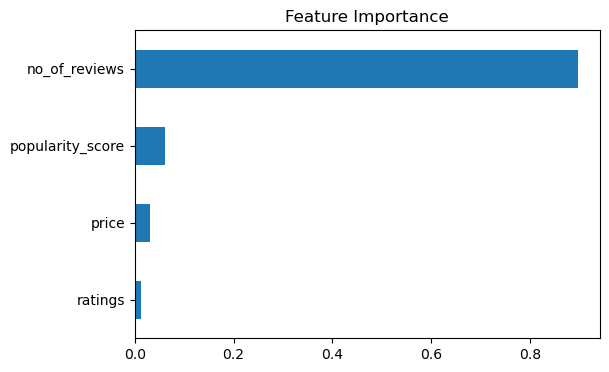

In [35]:
# Step 5: Classification model for prediction.
# Define X and y
X = df[['ratings', 'no_of_reviews', 'price', 'popularity_score']]
y = df['bestseller']

# Training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prediction and evaluation
y_pred = clf.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Feature analysis for the importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:\n")
print(importances)

# Visualize the importance
plt.figure(figsize=(6,4))
importances.plot(kind='barh')
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

## 📊 Comparing Ratings and Prices: Bestsellers vs. Non-Bestsellers

In this section, I compare two key features—**user ratings** and **price**—between bestsellers and non-bestsellers, using both visualization (boxplots) and statistical hypothesis testing.

### 1. Ratings Distribution

- The boxplot shows that bestsellers (`bestseller = 1`) generally have higher user ratings compared to non-bestsellers.
- The median rating for bestsellers is higher, with fewer low-rating outliers.
- Both groups are right-skewed, but the difference is visible.

### 2. Price Distribution

- The price boxplot indicates that both bestsellers and non-bestsellers have a similar spread and presence of high-price outliers.
- There is no obvious difference in median price between the two groups.

### 3. T-test for Ratings

To formally test the difference in ratings, an independent t-test was conducted:



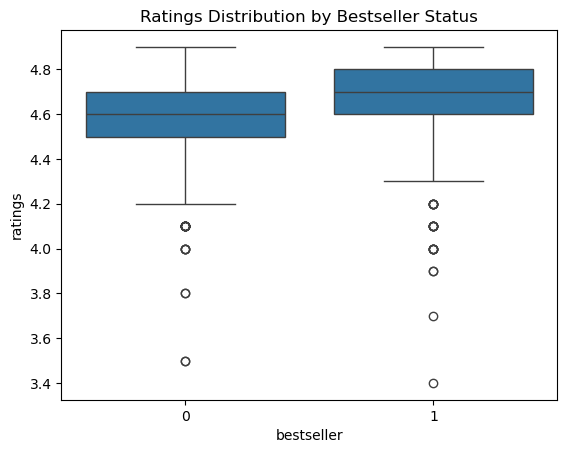

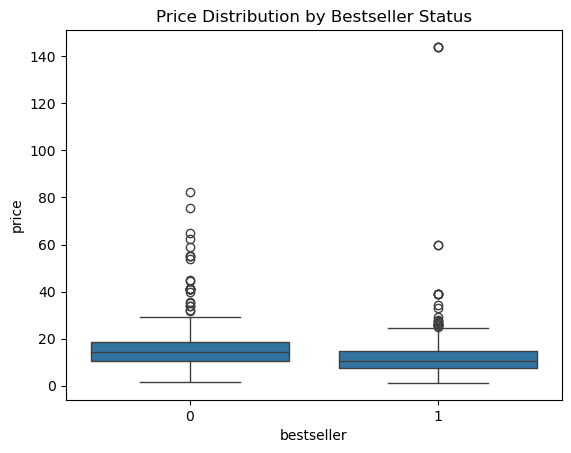

T-test for ratings: t=10.84, p=0.000


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for ratings
sns.boxplot(x='bestseller', y='ratings', data=df)
plt.title('Ratings Distribution by Bestseller Status')
plt.show()

# Boxplot for price
sns.boxplot(x='bestseller', y='price', data=df)
plt.title('Price Distribution by Bestseller Status')
plt.show()

# If you want: T-test
from scipy.stats import ttest_ind
t, p = ttest_ind(df[df.bestseller==1]['ratings'], df[df.bestseller==0]['ratings'], nan_policy='omit')
print(f'T-test for ratings: t={t:.2f}, p={p:.3f}')


## 🛒 Bestseller Rate by Cover Type and Fiction Status

This section explores how book format (cover type) and genre (fiction vs. non-fiction) relate to the likelihood of a book becoming a bestseller.

### 1. Bestseller Rate by Cover Type

- The grouped barplot displays the average bestseller rate for each `cover_type`.
- Hardcover and Paperback books have moderate bestseller rates.
- Some other cover types (like "Board book" or "Unknown") show higher variability, with "Unknown" in this dataset reaching a 100% bestseller rate—likely due to small sample size.
- This suggests that cover type may have some association with bestseller status, but the relationship is not uniform across all types.

### 2. Bestseller Rate by Fiction Status

- The crosstab below compares the proportion of bestsellers (`bestseller=1`) within fiction and non-fiction books:
  - For non-fiction (`is_fiction=0`): ~55.6% are bestsellers.
  - For fiction (`is_fiction=1`): ~78.4% are bestsellers.
- In contrast, only about 21.6% of fiction books are **not** bestsellers, versus 44.4% for non-fiction.
- **Interpretation:** Fiction books are more likely to be bestsellers compared to non-fiction books in this sample.

---

**Conclusion:**  
Both book format and genre show measurable associations with bestseller status. Fiction books, in particular, are much more likely to be bestsellers than non-fiction books, while cover type shows moderate but uneven effects.


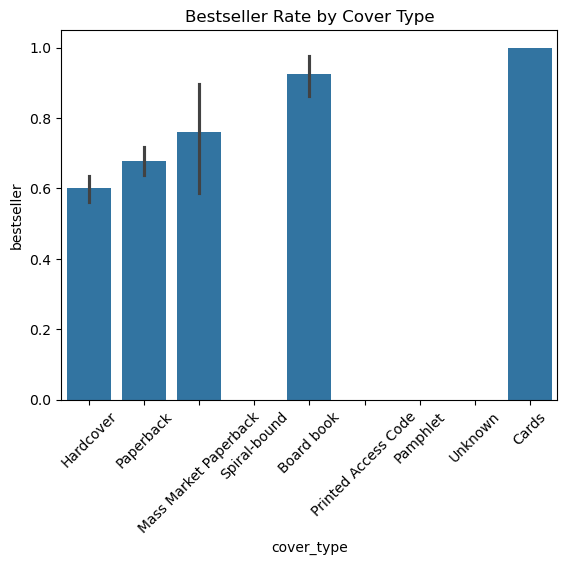

bestseller,0,1
is_fiction,,
0,0.444292,0.555708
1,0.216071,0.783929


In [82]:
# Grouped barplot
sns.barplot(x='cover_type', y='bestseller', data=df, estimator=np.mean)
plt.title('Bestseller Rate by Cover Type')
plt.xticks(rotation=45)
plt.show()

# Crosstab for is_fiction
pd.crosstab(df['is_fiction'], df['bestseller'], normalize='index')


## 📊 Author & Year Analysis

### Top Authors

By counting the number of appearances for each author in the dataset, we observe that a few prolific authors dominate the bestseller list:

- Rick Riordan: 20 books
- Suzanne Collins: 17 books
- Jeff Kinney: 17 books
- John Grisham: 15 books
- American Psychological Association: 13 books
- Gallup: 13 books
- Dr. Seuss: 13 books
- Gary Chapman: 13 books
- Bill Martin Jr.: 12 books
- Malcolm Gladwell: 12 books

This concentration suggests a strong "winner-takes-all" effect, where bestselling titles are highly clustered among a handful of top authors.

---

### Bestseller Rate by Year

By grouping and visualizing the bestseller rate by publication year, we find a clear upward trend:

- Around 2010, the proportion of bestsellers was approximately 0.25
- By 2020, this probability approaches 1

This indicates that the likelihood of a book becoming a bestseller has increased over the past decade, which may reflect changes in the publishing industry, marketing strategies, or the definition of a “bestseller.”

---

**Key Takeaways:**
- The bestseller list is heavily dominated by a small number of highly productive authors.
- The probability of being a bestseller has steadily increased over time, possibly due to industry changes, reader base growth, or evolving bestseller criteria.

**Suggestions for Further Analysis:**
- Analyze trends in genre or book type among top authors and across years.
- Explore how the relationship between ratings, number of reviews, and bestseller status changes over time.
- Use clustering to identify patterns among prolific authors and their bestseller outcomes.


author
Rick Riordan                          20
Suzanne Collins                       17
Jeff Kinney                           17
John Grisham                          15
American Psychological Association    13
Gallup                                13
Dr. Seuss                             13
Gary Chapman                          13
Bill Martin Jr.                       12
Malcolm Gladwell                      12
Name: count, dtype: int64


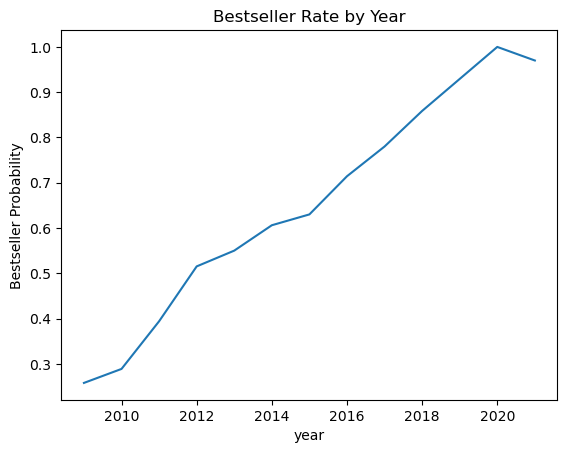

In [80]:
# Top authors
print(df['author'].value_counts().head(10))

# Year trend
df.groupby('year')['bestseller'].mean().plot()
plt.title('Bestseller Rate by Year')
plt.ylabel('Bestseller Probability')
plt.show()


## 📈 Interaction Analysis: Recency & High Rating

To further explore the factors influencing bestseller status, I analyzed the interaction between recency of publication (`is_recent`) and high user ratings (`is_high_rating`). The stacked bar chart below shows the average bestseller rate for each combination of these two binary features.

**Findings:**
- Both more recent books (`is_recent = 1`) and those with high ratings (`is_high_rating = 1`) are associated with a higher probability of being a bestseller.
- The interaction effect is clear: recent books with high ratings have the highest bestseller rates.
- In contrast, older books or books with lower ratings have substantially lower probabilities of being bestsellers.

**Interpretation:**
- This suggests that both being a newly published book and having a high rating are important—and potentially complementary—drivers for bestseller status in this dataset.


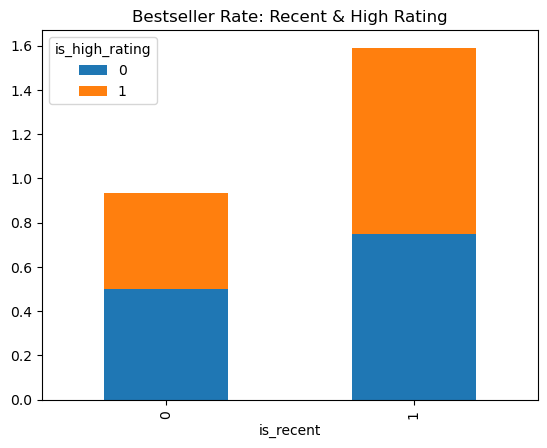

In [83]:
# Interaction: recent & high_rating
df.groupby(['is_recent', 'is_high_rating'])['bestseller'].mean().unstack().plot(kind='bar', stacked=True)
plt.title('Bestseller Rate: Recent & High Rating')
plt.show()
